#### İsmail GÜZEL 509182203
## Description of Data
Scatter plot below depicts two dimensional real valued training data points, $ X = [x_1\quad x_2]$, from two classes $C_1$ and $C_2$. The training set has 200 data points, 100 from each class. Data points are provided as two seperate csv files, C1_pts.csv and C2_pts.csv.

I suggest that in order to classify them We can use the support vector machine (SVM) models for the linear case.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm

Read and save the dataset as c1_class and c2_class by using **pandas** library

In [2]:
c1_class = pd.read_csv("C1_pts.csv", skiprows= 3 , header =None, sep= "\s+",names= ["x_1","x_2"])
c2_class = pd.read_csv("C2_pts.csv", skiprows= 3 , header =None, sep= "\s+",names= ["x_1","x_2"])

To see how they scattered in the coordinate system, plot the dataset as the following

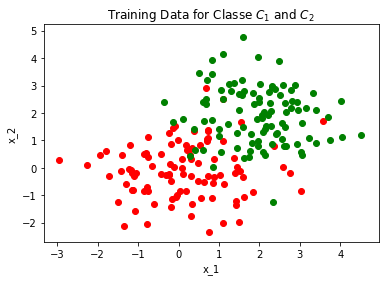

In [3]:
plt.scatter(c1_class["x_1"], c1_class["x_2"], color="r")
plt.scatter(c2_class["x_1"], c2_class["x_2"], color="g")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("Training Data for Classe $C_1$ and $C_2$")
plt.show()

As we see from the above figure, Our dataset is not linear separable.

After add to a column which is determined class, we combine the two class into one dataset.

So, now we have 200 rows and 3 columns. Save the first two columns of dataset as x because of feature space, and last one is outcome 1 or 2.

In [4]:
c1_class["Class"]="1"
c2_class["Class"]="2"
dataset=c1_class.append(c2_class, ignore_index= True)
x = dataset.iloc[:,:2]
y = dataset["Class"]

Set the our SVM model for the linear case and then fit the model

In [5]:
clf = svm.SVC(kernel='linear', C = 1)
clf.fit(x,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

No longer, we have the coefficients  $a_1$ and $a_2$ and intercept $ b $ of the optimal hyperplanes for the SVM

$$ a_1 x_1 + a_2 x_2 + b =0 $$

In [6]:
w = clf.coef_[0]
print(w) 
print(clf.intercept_[0])

x1 = np.linspace(-3,5) 
x2 = (-w[0] / w[1] ) * x1 - clf.intercept_[0] / w[1]

[0.91595601 1.09300934]
-2.074241057258097


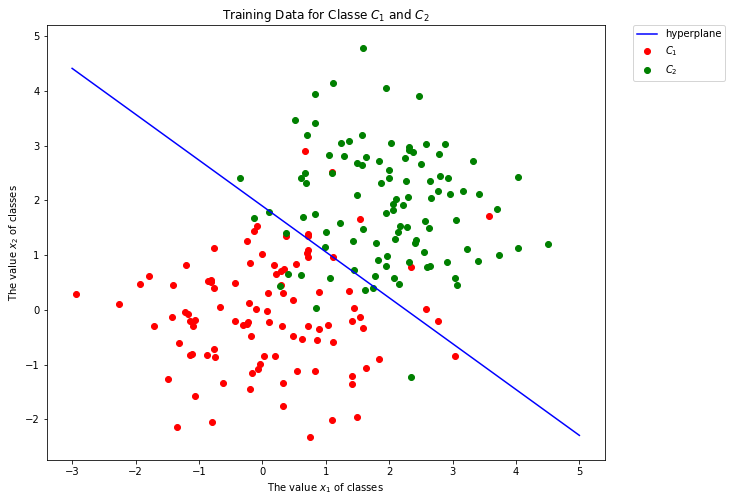

In [7]:
fig= plt.figure(figsize=(10,8)) 

plt.plot(x1, x2, 'b-', label="hyperplane")                                                   

plt.scatter(c1_class["x_1"], c1_class["x_2"], color="r", label = "$C_1$")
plt.scatter(c2_class["x_1"], c2_class["x_2"], color="g", label = "$C_2$")

plt.xlabel("The value $x_1$ of classes")
plt.ylabel("The value $x_2$ of classes")
plt.title("Training Data for Classe $C_1$ and $C_2$")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()